In [ ]:
# ANOVA 

# Assumptions
# 1) simple random sample
# 2) independent samples
# 3) normal populations
# 4) equal population standard deviations

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [17]:
# Sample data: Replace with your actual data
# Example format: A dictionary where keys are group names and values are lists of observations
data = {
    "Group1": [13,8,11,12,11],
    "Group2": [15,10,16,11,13,10],
    "Group3": [5,11,9,5],
    "Group4": [8,10,6,5,7],
}

# Convert the dictionary into a DataFrame with unequal lengths
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))

# Drop NaN values (optional if NaNs are placeholders for missing data)
df = df.dropna(how='all')

p-value: 0.4531612694263458
distribution result: Normal


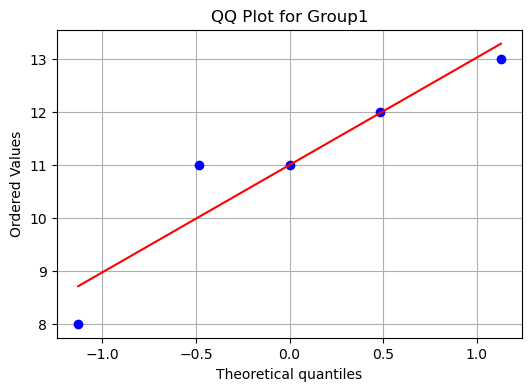

p-value: 0.2817235589027405
distribution result: Normal


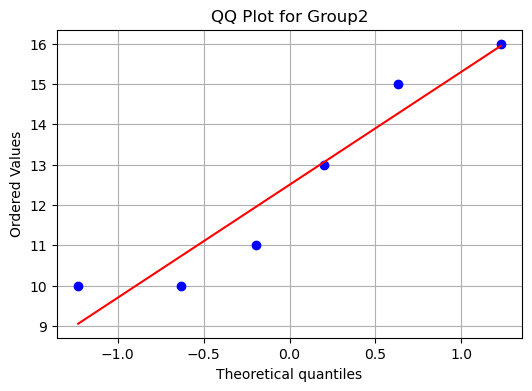

p-value: 0.2242308408021927
distribution result: Normal


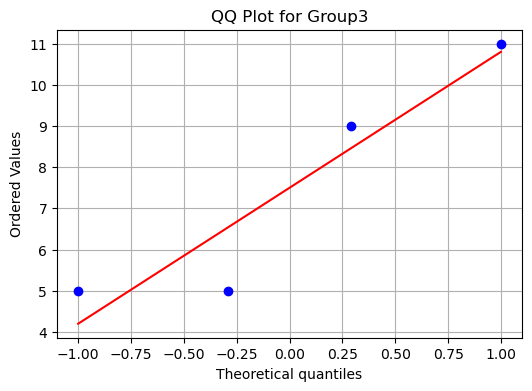

p-value: 0.9276362061500549
distribution result: Normal


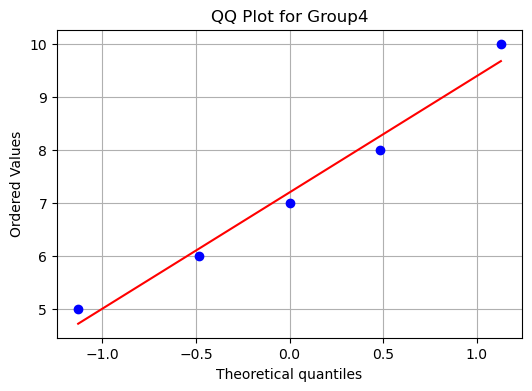

In [18]:
# Assumption check: Normality
# Null and Alternative Hypothesis:
# H0 (Null): The data for each group comes from a normal distribution.
# H1 (Alternative): The data for each group does not come from a normal distribution.

# Perform QQ Plots for Normality Testing
for group in df.columns:
    group_data = df[group].dropna()
    
    # Shapiro-Wilk Test
    stat, p_value = stats.shapiro(group_data)
    result = "Normal" if p_value > 0.05 else "Not Normal"
    print(f'p-value: {p_value}')
    print(f'distribution result: {result}')
    
    # QQ-plot
    plt.figure(figsize=(6, 4))
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f"QQ Plot for {group}")
    plt.grid()
    plt.show()

In [20]:
# assumption check: equal population standard deviations
# Check for equal population standard deviations
group_stds = df.std()  # Calculate standard deviations for each group
max_std = group_stds.max()
min_std = group_stds.min()
std_ratio = max_std / min_std

print("\nStandard Deviations of Each Group:")
print(group_stds)

print(f"\nRatio of Largest to Smallest Standard Deviation: {std_ratio:.2f}")
if std_ratio < 2:
    print("The ratio is less than 2, so the assumption of equal population standard deviations is met.")
else:
    print("The ratio is greater than or equal to 2, so the assumption of equal population standard deviations is not met.")


Standard Deviations of Each Group:
Group1    1.870829
Group2    2.588436
Group3    3.000000
Group4    1.923538
dtype: float64

Ratio of Largest to Smallest Standard Deviation: 1.60
The ratio is less than 2, so the assumption of equal population standard deviations is met.


In [ ]:
# state the null and alternative hypothesis
# H0: u1 = u2 = u3 = u4
# Ha: Not all the means are equal

In [21]:
# define alpha
alpha = 0.05

In [26]:
# Compute SSTR, MSTR, SSE, MSE, F, SST

# Calculate group sizes, means, and overall mean
group_sizes = df.count()
group_means = df.mean()
overall_mean = df.stack().mean()  # Overall mean of all data

# Total number of observations and groups
N = df.stack().count()
k = len(df.columns)

# Calculate SSTR (Sum of Squares for Treatment)
SSTR = sum(group_sizes[group] * (group_means[group] - overall_mean) ** 2 for group in df.columns)

# Calculate SSE (Sum of Squares for Error)
SSE = sum(((df[group] - group_means[group]) ** 2).sum() for group in df.columns if not df[group].isna().all())

# Calculate SST (Total Sum of Squares)
SST = SSTR + SSE

# Degrees of freedom
df_between = k - 1  # Degrees of freedom for treatments
df_within = N - k   # Degrees of freedom for error

# Calculate MSTR and MSE
MSTR = SSTR / df_between
MSE = SSE / df_within

# Calculate F-statistic
F = MSTR / MSE

# Display results
print(f"\nTotal Number of Observations (N): {N}")
print(f"Total Number of Groups (k): {k}")

print(f"\nSSTR (Sum of Squares for Treatment): {SSTR:.2f}")
print(f"MSTR (Mean Square for Treatment): {MSTR:.2f}")
print(f"SSE (Sum of Squares for Error): {SSE:.2f}")
print(f"SST (Total Sum of Squares): {SST:.2f}")
print(f"MSE (Mean Square for Error): {MSE:.2f}")
print(f"\nF (F-statistic): {F:.2f}")


Total Number of Observations (N): 20
Total Number of Groups (k): 4

SSTR (Sum of Squares for Treatment): 105.90
MSTR (Mean Square for Treatment): 35.30
SSE (Sum of Squares for Error): 89.30
SST (Total Sum of Squares): 195.20
MSE (Mean Square for Error): 5.58

F (F-statistic): 6.32


In [34]:
# Hypothesis Testing
# Test results and interpretation
print(f"ANOVA Results:")

# Critical value for F-test 
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)
print(f"\nF (F-statistic): {F:.2f}")
print(f"Critical Value (alpha = {alpha}): {critical_value:.2f}")
if F > critical_value:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
    print("At least two of the groups have different means values.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the group means.")


# P-value for F-statistic
p_value = 1 - stats.f.cdf(F, df_between, df_within)
print(f"\nP-value for F-statistic: {p_value:.4f}")

if p_value < alpha:
    print("P-value test: Reject the null hypothesis at alpha = 0.05.")
    print("At least two of the groups have different means values.")
else:
    print("P-value test: Fail to reject the null hypothesis at alpha = 0.05.")

ANOVA Results:

F (F-statistic): 6.32
Critical Value (alpha = 0.05): 3.24
Reject the null hypothesis: There is a significant difference between the group means.
At least two of the groups have different means values.

P-value for F-statistic: 0.0049
P-value test: Reject the null hypothesis at alpha = 0.05.
At least two of the groups have different means values.
